In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import calendar
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Reading the Datasets  
df=pd.read_csv("train_cab.csv")
test_data=pd.read_csv("test.csv")

# Exploring the Data

In [ ]:
df.head()

In [4]:
test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [6]:
df.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [7]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


# Imputing the data

In [8]:
#Filling the na with mode
df['passenger_count'].fillna(df['passenger_count'].mode()[0],inplace=True)

In [9]:
df['passenger_count'].isnull().sum()

0

In [10]:
#Dropping the na values
df.dropna(how='any',axis='rows',inplace=True)
df['fare_amount'].isnull().sum()

0

In [11]:
df['fare_amount'].describe()

count     16043
unique      468
top         6.5
freq        759
Name: fare_amount, dtype: object

# Removing the outliers using visualization

In [12]:
print("Range of Pickup Latitude is ", (min(df['pickup_latitude']),max(df['pickup_latitude'])))

Range of Pickup Latitude is  (-74.006893, 401.083332)


In [13]:
print("Range of Dropoff Latitude is ", (min(df['dropoff_latitude']),max(df['dropoff_longitude'])))

Range of Dropoff Latitude is  (-74.006377, 40.802437)


In [14]:
print("Range of Pickup Longitude is ", (min(df['pickup_longitude']),max(df['pickup_longitude'])))

Range of Pickup Longitude is  (-74.438233, 40.766125)


In [15]:
print("Range of Dropoff Longitude is ", (min(df['dropoff_longitude']),max(df['dropoff_longitude'])))

Range of Dropoff Longitude is  (-74.42933199999999, 40.802437)


In [16]:
print("Range of Pickup Latitude is ", (min(test_data['pickup_latitude']),max(test_data['pickup_latitude'])))

Range of Pickup Latitude is  (40.573143, 41.709555)


In [17]:
print("Range of Dropoff Latitude is ", (min(test_data['dropoff_latitude']),max(test_data['dropoff_latitude'])))

Range of Dropoff Latitude is  (40.568973, 41.696683)


In [18]:
print("Range of Pickup Longitude is ", (min(test_data['pickup_longitude']),max(test_data['pickup_longitude'])))

Range of Pickup Longitude is  (-74.252193, -72.986532)


In [19]:
print("Range of Dropoff Longitude is ", (min(test_data['dropoff_longitude']),max(test_data['dropoff_longitude'])))

Range of Dropoff Longitude is  (-74.263242, -72.990963)


In [20]:
#Setting the boundaries of longitudes and latitudes using the test dataset to remove the outliers 
boundary={'min_long':-74.263242,'min_lat':40.573143,'max_long':-72.986532,'max_lat':41.709555}

In [21]:
df.loc[~((df.pickup_longitude >= boundary['min_long'] ) & (df.pickup_longitude <= boundary['max_long']) &
            (df.pickup_latitude >= boundary['min_lat']) & (df.pickup_latitude <= boundary['max_lat']) &
            (df.dropoff_longitude >= boundary['min_long']) & (df.dropoff_longitude <= boundary['max_long']) &
            (df.dropoff_latitude >=boundary['min_lat']) & (df.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=1

df.loc[((df.pickup_longitude >= boundary['min_long'] ) & (df.pickup_longitude <= boundary['max_long']) &
            (df.pickup_latitude >= boundary['min_lat']) & (df.pickup_latitude <= boundary['max_lat']) &
            (df.dropoff_longitude >= boundary['min_long']) & (df.dropoff_longitude <= boundary['max_long']) &
            (df.dropoff_latitude >=boundary['min_lat']) & (df.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=0

In [22]:
print("Outlier vs Non Outlier Counts")
print(df['is_outlier_loc'].value_counts())

Outlier vs Non Outlier Counts
0.0    15691
1.0      352
Name: is_outlier_loc, dtype: int64


In [23]:
df=df.loc[df['is_outlier_loc']==0]
df.drop(['is_outlier_loc'],axis=1,inplace=True)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15691 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          15691 non-null object
pickup_datetime      15691 non-null object
pickup_longitude     15691 non-null float64
pickup_latitude      15691 non-null float64
dropoff_longitude    15691 non-null float64
dropoff_latitude     15691 non-null float64
passenger_count      15691 non-null float64
dtypes: float64(5), object(2)
memory usage: 980.7+ KB


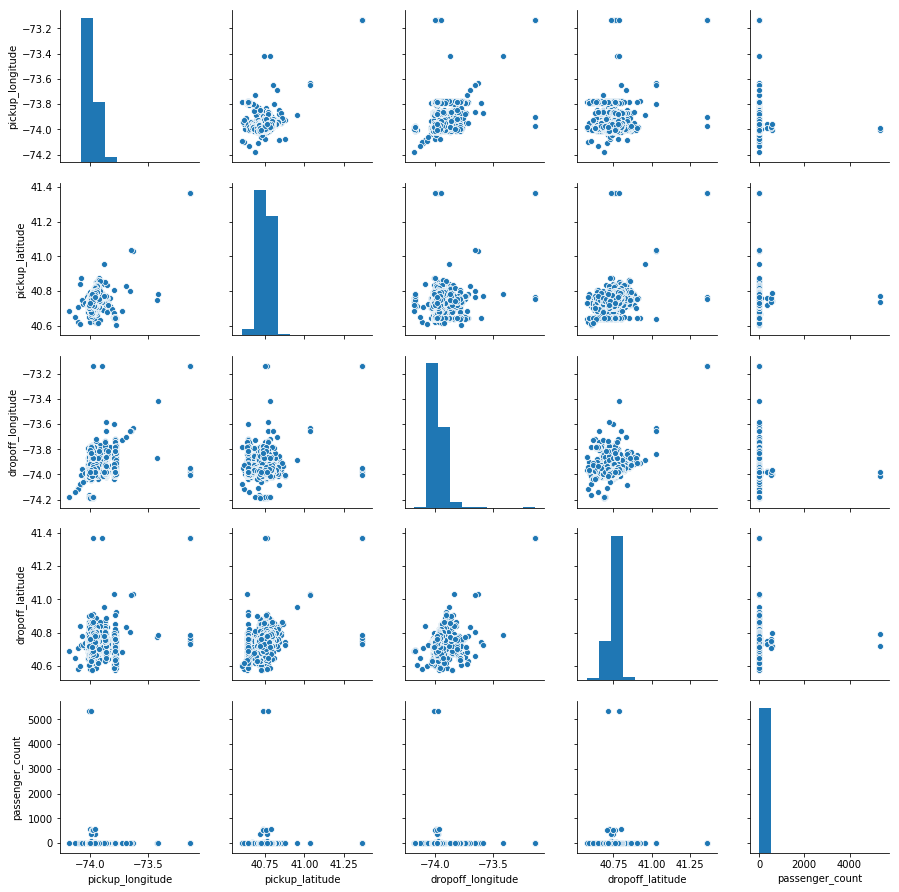

In [25]:
sns.pairplot(df)

In [26]:
df=df[df['fare_amount']!='430-']
df['fare_amount']=df['fare_amount'].astype(float)

In [27]:
df.loc[df['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1.0
13032,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4.0


In [28]:
#The fare amount cannot be negative
df=df.loc[df['fare_amount']>0]

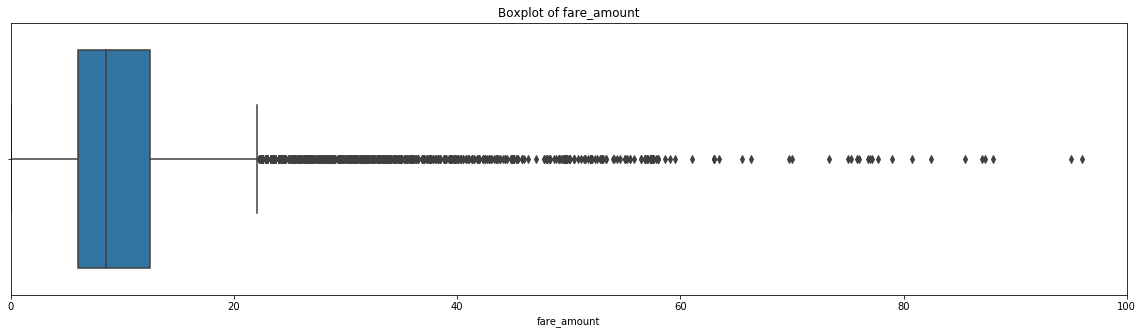

In [29]:
#Plotting Boxplot
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=df['fare_amount'],orient='h')
plt.title('Boxplot of fare_amount')
plt.show()

In [30]:
q75, q25 = np.percentile(df['fare_amount'], [75 ,25])
print(q75,q25)
#Calculate IQR
iqr = q75 - q25
#Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)
df=df.loc[df['fare_amount']>minimum]
df=df.loc[df['fare_amount']<maximum]


12.5 6.0


Text(0.5, 1.0, 'Distribution of Trip Fare')

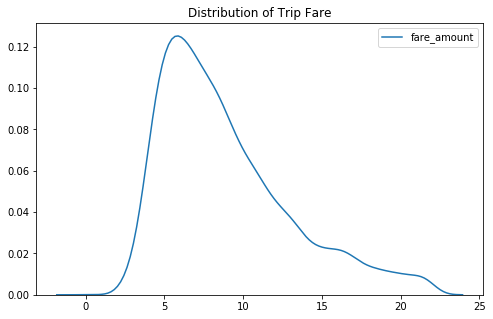

In [31]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['fare_amount']).set_title("Distribution of Trip Fare")

In [32]:
df['longitude_diff']=(df.pickup_longitude-df.dropoff_longitude).abs()
df['latitude_diff']=(df.pickup_latitude-df.dropoff_latitude).abs()

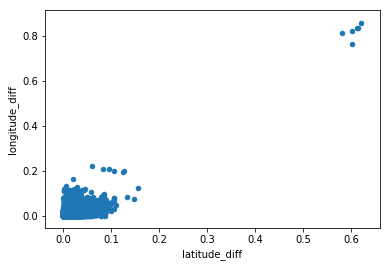

In [33]:
df.plot.scatter('latitude_diff','longitude_diff')

In [34]:
df[{'latitude_diff','longitude_diff'}]

,latitude_diff,longitude_diff
0,0.009041,0.002701
1,0.070701,0.036780
2,0.010708,0.008504
3,0.024949,0.004437
4,0.015754,0.011440
5,0.026603,0.028072
6,0.013180,0.006200
7,0.023090,0.038795
9,0.024265,0.010882
10,0.003583,0.015614


In [35]:
df = df[(df.longitude_diff > 0.0) & (df.longitude_diff < 5.0) & (df.latitude_diff > 0.0) & (df.latitude_diff < 5.0)]

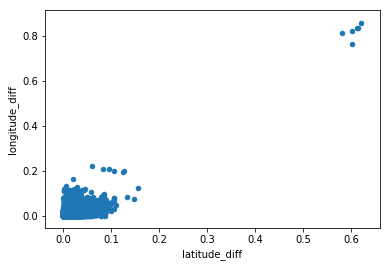

In [36]:
df.plot.scatter('latitude_diff','longitude_diff')

In [37]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754


In [38]:
#Splitting the date_time into components
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors='coerce')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour_of_day'] = df.pickup_datetime.dt.hour
df['day'] = df.pickup_datetime.dt.day
df['week'] = df.pickup_datetime.dt.week
df['month'] = df.pickup_datetime.dt.month
df['day_of_year'] = df.pickup_datetime.dt.dayofyear
df['week_of_year'] = df.pickup_datetime.dt.weekofyear

In [39]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff,hour_of_day,day,week,month,day_of_year,week_of_year
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,17.0,15.0,25.0,6.0,166.0,25.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,16.0,5.0,1.0,1.0,5.0,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,0.0,18.0,33.0,8.0,230.0,33.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,4.0,21.0,16.0,4.0,112.0,16.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,7.0,9.0,10.0,3.0,68.0,10.0
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603,9.0,6.0,1.0,1.0,6.0,1.0
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,0.006200,0.013180,20.0,20.0,47.0,11.0,325.0,47.0
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,0.038795,0.023090,17.0,4.0,1.0,1.0,4.0,1.0
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,0.010882,0.024265,1.0,2.0,36.0,9.0,245.0,36.0
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,0.015614,0.003583,7.0,8.0,14.0,4.0,99.0,14.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A46107FB00>,
      dtype=object)

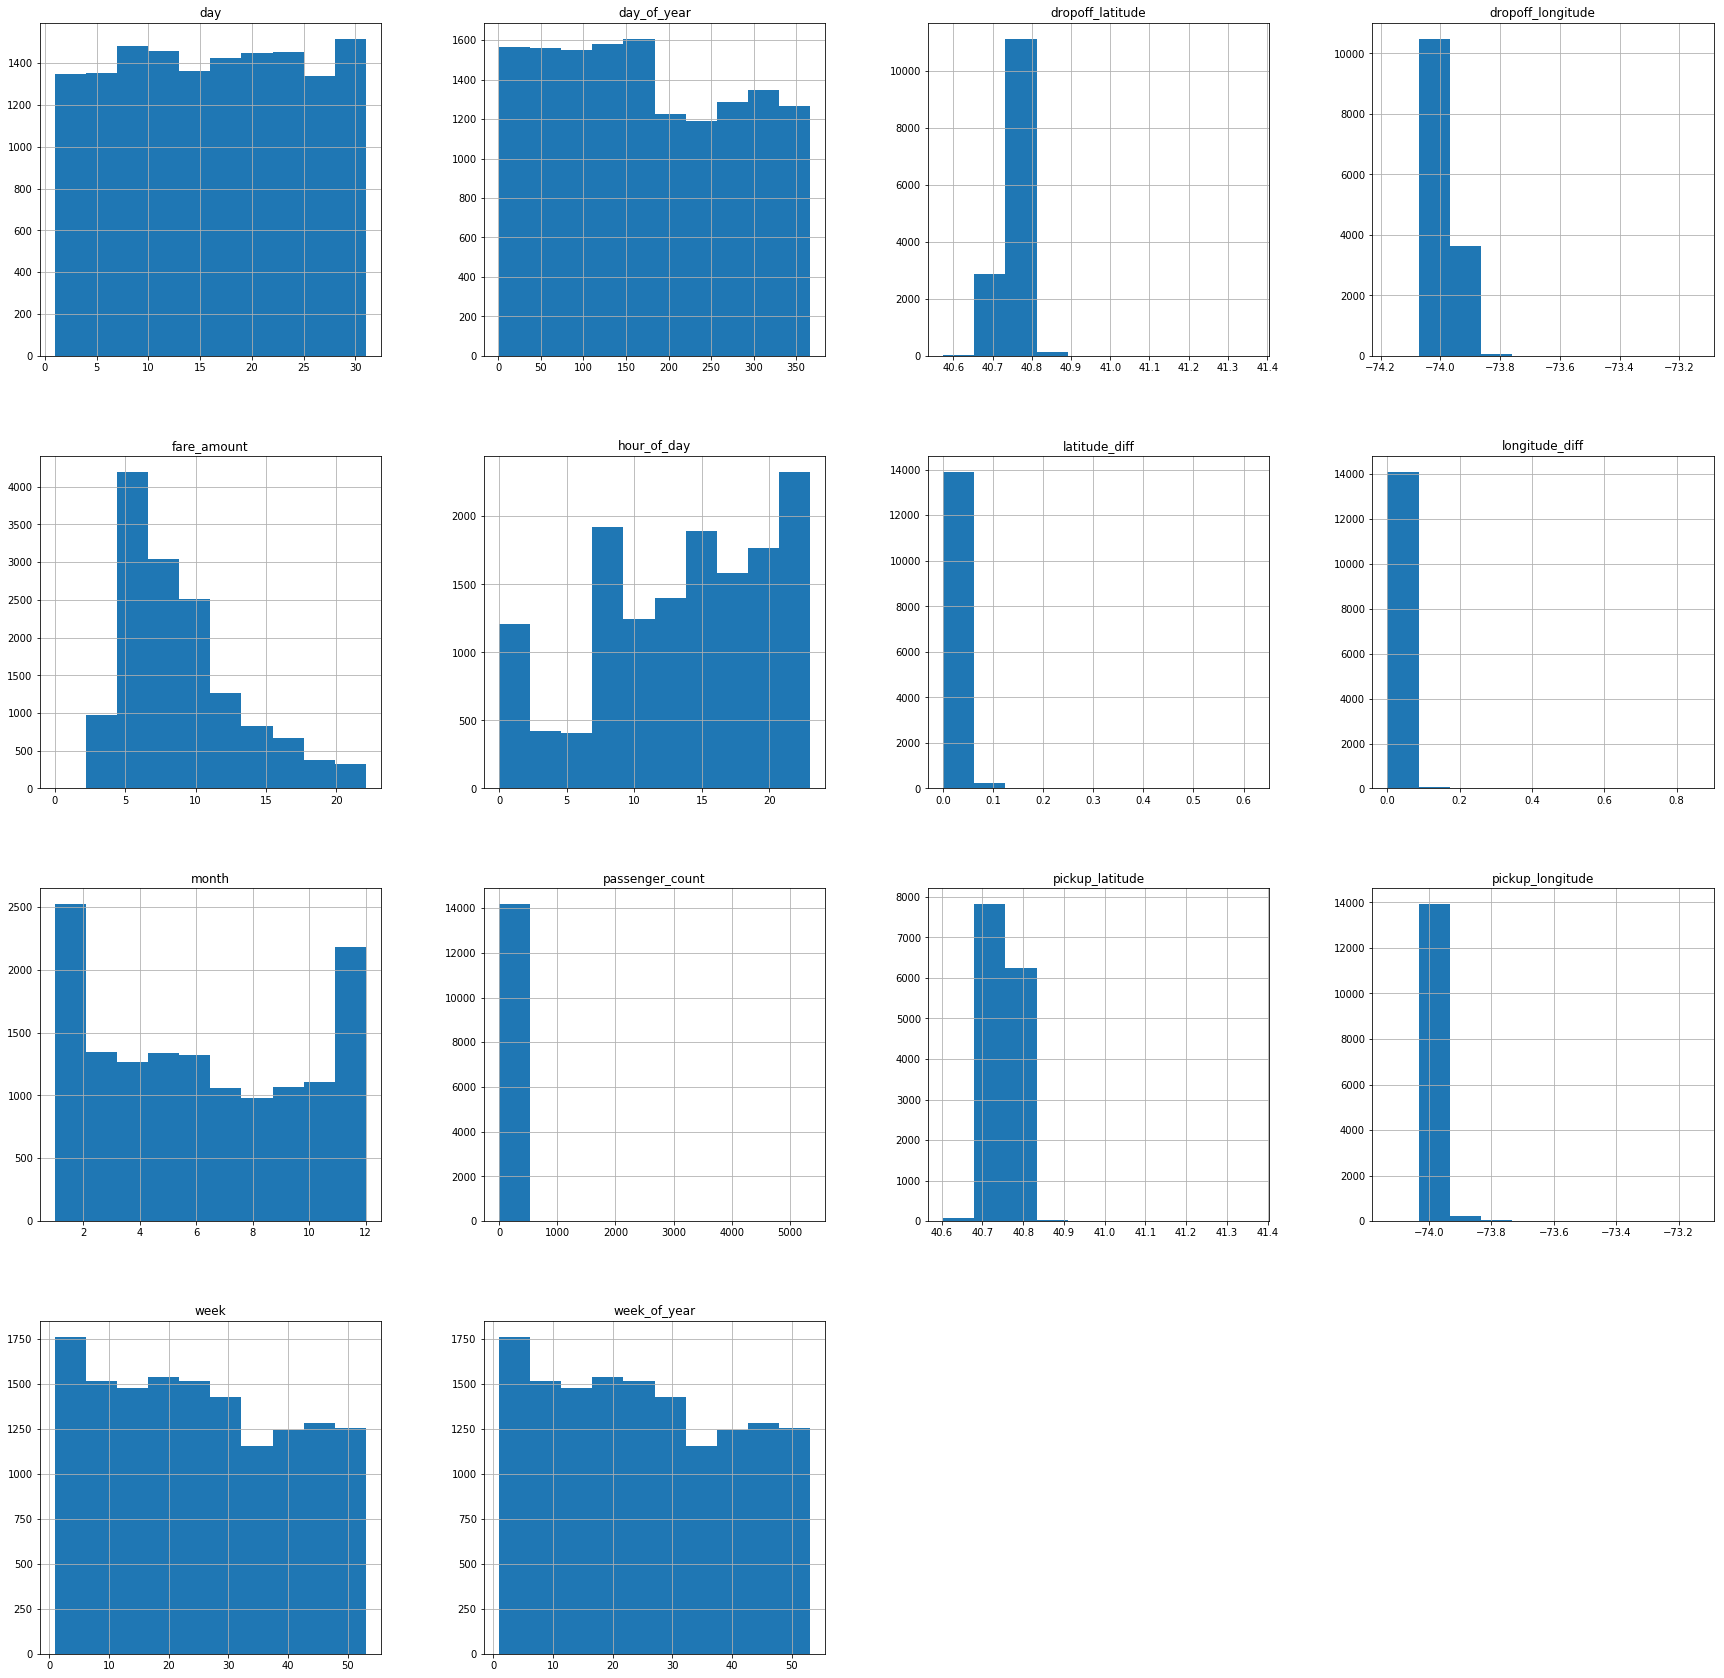

In [40]:
df.hist(figsize=(30,30))


In [41]:
df=df.loc[df['passenger_count']<6]

In [42]:
# Convert lons and lats into cartesian coordinates. Assume the earth as sphere not ellipsoid
R = 6371000 # Approximate mean radius of earth (in m)
 # lons and lats must be in radians
lon1,lat1,lon2,lat2 = map(np.radians, [df.pickup_longitude, df.pickup_latitude,df.dropoff_longitude, df.dropoff_latitude])
df['pickup_x'] = R*np.cos(lon1)*np.cos(lat1)
df['pickup_y'] = R*np.sin(lon1)*np.cos(lat1)
df['dropoff_x'] = R*np.cos(lon2)*np.cos(lat2)
df['dropoff_y'] = R*np.sin(lon2)*np.cos(lat2)

# Now calculate the euclidean distance
x1 = df['pickup_x']
y1 = df['pickup_y']
x2 = df['dropoff_x']
y2 = df['dropoff_y']
df['euclidean_distance'] = (np.sqrt(( x1 - x2)**2 + ( y1 - y2)**2))/1000 # in km

In [43]:
# Calculate manhattan distance from x and y coordinates
df['manhattan_distance'] = (np.abs(x1 - x2) + np.abs(y1 - y2))/1000 # in km

In [44]:
df


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff,hour_of_day,...,week,month,day_of_year,week_of_year,pickup_x,pickup_y,dropoff_x,dropoff_y,euclidean_distance,manhattan_distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,17.0,...,25.0,6.0,166.0,25.0,1.343530e+06,-4.637845e+06,1.343931e+06,-4.638412e+06,0.694173,0.967674
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,16.0,...,1.0,1.0,5.0,1.0,1.329823e+06,-4.642550e+06,1.331386e+06,-4.636763e+06,5.994265,7.350444
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,0.0,...,33.0,8.0,230.0,33.0,1.331521e+06,-4.638291e+06,1.331047e+06,-4.639236e+06,1.057022,1.418821
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,4.0,...,16.0,4.0,112.0,16.0,1.331729e+06,-4.640355e+06,1.330870e+06,-4.638718e+06,1.848904,2.496108
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,7.0,...,10.0,3.0,68.0,10.0,1.332571e+06,-4.637480e+06,1.333181e+06,-4.636114e+06,1.495617,1.975419
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603,9.0,...,1.0,1.0,6.0,1.0,1.330638e+06,-4.640782e+06,1.332379e+06,-4.638274e+06,3.052946,4.248722
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,0.006200,0.013180,20.0,...,47.0,11.0,325.0,47.0,1.331935e+06,-4.638898e+06,1.332173e+06,-4.637834e+06,1.090040,1.301598
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,0.038795,0.023090,17.0,...,1.0,1.0,4.0,1.0,1.333807e+06,-4.636662e+06,1.331130e+06,-4.639175e+06,3.672324,5.190860
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,0.010882,0.024265,1.0,...,36.0,9.0,245.0,36.0,1.332238e+06,-4.640154e+06,1.330871e+06,-4.638714e+06,1.985410,2.806848
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,0.015614,0.003583,7.0,...,14.0,4.0,99.0,14.0,1.330903e+06,-4.640290e+06,1.332239e+06,-4.640177e+06,1.341016,1.449220


In [45]:
df.drop(['pickup_datetime','pickup_x','pickup_y','dropoff_x','dropoff_y'], axis = 1, inplace = True)
df.isnull().any()


fare_amount           False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
passenger_count       False
longitude_diff        False
latitude_diff         False
hour_of_day            True
day                    True
week                   True
month                  True
day_of_year            True
week_of_year           True
euclidean_distance    False
manhattan_distance    False
dtype: bool

In [46]:
df = df.fillna(method='ffill')
df.reset_index()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff,hour_of_day,day,week,month,day_of_year,week_of_year,euclidean_distance,manhattan_distance
0,0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,17.0,15.0,25.0,6.0,166.0,25.0,0.694173,0.967674
1,1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,16.0,5.0,1.0,1.0,5.0,1.0,5.994265,7.350444
2,2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,0.0,18.0,33.0,8.0,230.0,33.0,1.057022,1.418821
3,3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,4.0,21.0,16.0,4.0,112.0,16.0,1.848904,2.496108
4,4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,7.0,9.0,10.0,3.0,68.0,10.0,1.495617,1.975419
5,5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603,9.0,6.0,1.0,1.0,6.0,1.0,3.052946,4.248722
6,6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.0,0.006200,0.013180,20.0,20.0,47.0,11.0,325.0,47.0,1.090040,1.301598
7,7,16.5,-73.951300,40.774138,-73.990095,40.751048,1.0,0.038795,0.023090,17.0,4.0,1.0,1.0,4.0,1.0,3.672324,5.190860
8,9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.0,0.010882,0.024265,1.0,2.0,36.0,9.0,245.0,36.0,1.985410,2.806848
9,10,5.3,-73.996335,40.737142,-73.980721,40.733559,1.0,0.015614,0.003583,7.0,8.0,14.0,4.0,99.0,14.0,1.341016,1.449220


In [47]:
y=df['fare_amount']
x=df.drop(['fare_amount'],axis=1)

# Linear Regression

In [48]:
from sklearn import model_selection

In [49]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [50]:
# Setup the parameters and distribution
param= {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': False}
Best score is 0.38598545790826344


In [51]:
linear_reg = LinearRegression(copy_X= True, fit_intercept=False)
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [52]:
print("R^2: {}".format(linear_reg.score(X_test, y_test)))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test))*100)
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

R^2: 0.4686137747581447
Root Mean Squared Error: 3.0546730009060696
MAPE:  54.977680125669515
Mean Squared Error: 9.331027142464492
Mean Absolute Error: 2.325668627212664


# Ridge Regression

In [53]:
# Setup the parameters and distributions to sample from: param_dist
param = {'alpha':np.logspace(-4, 0, 50),'normalize':[True,False],'max_iter':range(500,5000,500)}
# Instantiate a Decision ridge classifier: ridge
ridge = Ridge()

# Instantiate the gridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param, cv=5,scoring='r2')

# Fit it to the data
ridge_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters:",(ridge_cv.best_params_))
print("Best score is ",(ridge_cv.best_score_))

Tuned Decision ridge Parameters: {'alpha': 0.0001, 'max_iter': 500, 'normalize': False}
Best score is  0.38576373297263056


In [54]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.0001, normalize=False,max_iter = 500)

# Fit the regressor to the data
ridge.fit(X_train,y_train)

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

[-3.12586925e+01  1.64604480e+00  1.86529899e+01 -2.01451816e+01
 -1.68231619e-02 -2.21732195e+02 -7.56080411e+01  4.81512643e-03
  5.50348847e-02 -3.88501865e-03  1.89685540e+00 -6.01318247e-02
 -3.88652121e-03  5.72573156e+00 -1.56119228e+00]


In [55]:
y_pred = ridge.predict(X_test)
print("R^2:",(ridge.score(X_test, y_test)))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test))*100)
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

R^2: 0.4687912223924097
Root Mean Squared Error: 3.0541629295766226
MAPE:  54.525886659931686
Mean Squared Error: 9.327911200400058
Mean Absolute Error: 2.324710596189648


# Lasso Regression

In [56]:
# Setup the parameters and distributions to sample from: param_dist
param = {'alpha':[1,0.1,0.01,0.001,0.0001,0],
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision lasso classifier: lasso
lasso = Lasso()

# Instantiate the gridSearchCV object: lasso_cv
lasso_cv = GridSearchCV(lasso, param, cv=5,scoring='r2')

# Fit it to the data
lasso_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Decision lasso Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Decision lasso Parameters: {'alpha': 0, 'max_iter': 4500, 'normalize': True}
Best score is 0.3857343722187197


In [57]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0, normalize=True,max_iter = 4500)

# Fit the regressor to the data
lasso.fit(x,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-3.05495232e+01  1.81840150e+00  1.82093481e+01 -1.88871123e+01
 -4.72079456e-03 -2.18949008e+02 -7.70116531e+01  5.08179755e-03
  9.10639937e-03  6.60519761e-03  3.87353230e-01 -1.10575014e-02
 -1.11144120e-02  5.63986899e+00 -1.44565179e+00]


In [58]:
y_pred = lasso.predict(X_test)
print("R^2:",(lasso.score(X_test, y_test)))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test))*100)
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

R^2: 0.4934779566589604
Root Mean Squared Error: 2.9823510001334346
MAPE:  52.70949052952232
Mean Squared Error: 8.894417487996899
Mean Absolute Error: 2.259150982295565


# Decision Tree Regression

In [59]:
# Setup the parameters and distributions to sample from: param_dist
param = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param, cv=5)

# Fit it to the data
tree_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters:",tree_cv.best_params_)
print("Best score is :",tree_cv.best_score_)

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 10}
Best score is : 0.6925033827008692


In [60]:
# Instantiate a tree regressor: tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=14)
# Fit the regressor to the data
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("R^2:",(tree.score(X_test, y_test)))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test))*100)
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

R^2: 0.7139731276057336
Root Mean Squared Error: 2.2411090989420903
MAPE:  36.80006737030525
Mean Squared Error: 5.022569993361029
Mean Absolute Error: 1.5787100309686268


# Random Forest Regression

In [62]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 16, 'bootstrap': True}
Best score is 0.7312742797500662


In [64]:
Forest = RandomForestRegressor(n_estimators=300, min_samples_split= 4, min_samples_leaf=4, max_features='log2', max_depth=16, bootstrap=True)
# Fit the regressor to the data
Forest.fit(X_train,y_train)
y_pred = Forest.predict(X_test)
print("R^2:",(Forest.score(X_test, y_test)))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test))*100)
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

R^2: 0.7444631247472726
Root Mean Squared Error: 2.118294653840564
MAPE:  37.26564340287496
Mean Squared Error: 4.487172240489516
Mean Absolute Error: 1.4948072045341703
